## Scenario1: Unsecured lending

### Exploratory Data Analysis 

In [154]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix, classification_report
from imblearn.over_sampling import SMOTE
import warnings
warnings.filterwarnings('ignore')

sns.set_color_codes("pastel")

%matplotlib inline

In [155]:
df = pd.read_csv('UCI_Credit_Card.csv')
df

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000.0,1,3,1,39,0,0,0,0,...,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,0
29996,29997,150000.0,1,3,2,43,-1,-1,-1,-1,...,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,0
29997,29998,30000.0,1,2,2,37,4,3,2,-1,...,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,1
29998,29999,80000.0,1,3,1,41,1,-1,0,0,...,52774.0,11855.0,48944.0,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0,1


In [156]:
df['IsDefaulter'] =df['default.payment.next.month']
df.drop('default.payment.next.month',axis = 1, inplace=True)

Text(0.5, 1.0, 'Distribution of Borrowers')

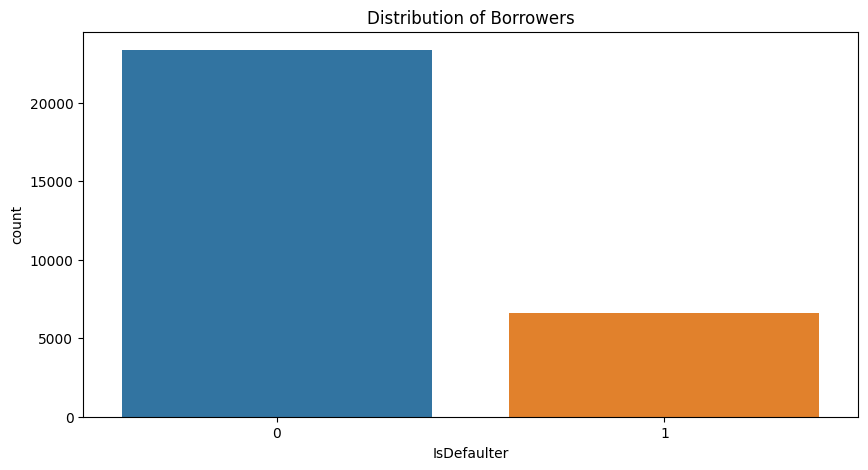

In [157]:
plt.figure(figsize=(10,5))
sns.countplot(x = 'IsDefaulter', data = df)
plt.title("Distribution of Borrowers")

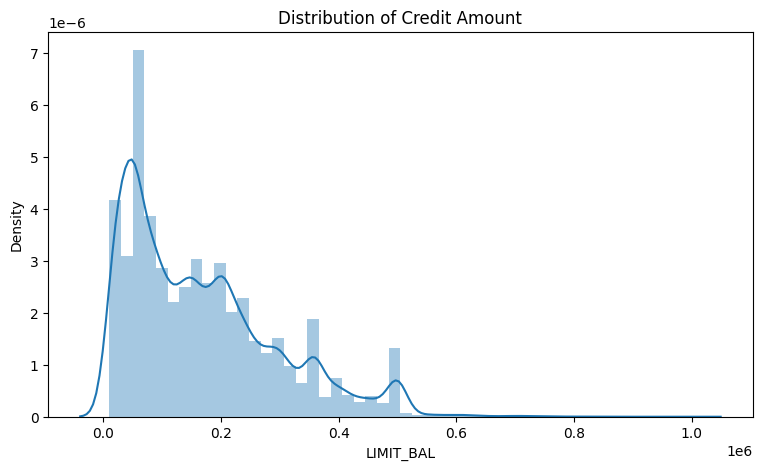

In [158]:
plt.subplots(figsize=(20,5))
plt.subplot(121)
sns.distplot(df['LIMIT_BAL'])
plt.title("Distribution of Credit Amount")

plt.show()

In [159]:
df['IsDefaulter'].value_counts()

0    23364
1     6636
Name: IsDefaulter, dtype: int64

In [160]:
df['EDUCATION'].value_counts()

2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: EDUCATION, dtype: int64

In [161]:
merge_unknowns = (df['EDUCATION'] == 5) | (df['EDUCATION'] == 6) | (df['EDUCATION'] == 0)
df.loc[merge_unknowns, 'EDUCATION'] = 4
df['EDUCATION'].value_counts()

2    14030
1    10585
3     4917
4      468
Name: EDUCATION, dtype: int64

In [162]:
df['SEX'].value_counts()

2    18112
1    11888
Name: SEX, dtype: int64

In [163]:
df['MARRIAGE'].value_counts()

2    15964
1    13659
3      323
0       54
Name: MARRIAGE, dtype: int64

In [164]:
merge_unknowns = df['MARRIAGE'] == 0
df.loc[merge_unknowns, 'MARRIAGE'] = 3
df['MARRIAGE'].value_counts()

2    15964
1    13659
3      377
Name: MARRIAGE, dtype: int64

In [165]:
categorical_features = ['SEX', 'EDUCATION', 'MARRIAGE']
cat_df = df[categorical_features]
cat_df['Defaulter'] = df['IsDefaulter']

In [166]:
cat_df.replace({'SEX': {1 : 'MALE', 2 : 'FEMALE'}, 'EDUCATION' : {1 : 'graduate school', 2 : 'university', 3 : 'high school', 4 : 'others'}, 'MARRIAGE' : {1 : 'married', 2 : 'single', 3 : 'others'}}, inplace = True)
df

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,IsDefaulter
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000.0,1,3,1,39,0,0,0,0,...,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,0
29996,29997,150000.0,1,3,2,43,-1,-1,-1,-1,...,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,0
29997,29998,30000.0,1,2,2,37,4,3,2,-1,...,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,1
29998,29999,80000.0,1,3,1,41,1,-1,0,0,...,52774.0,11855.0,48944.0,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0,1


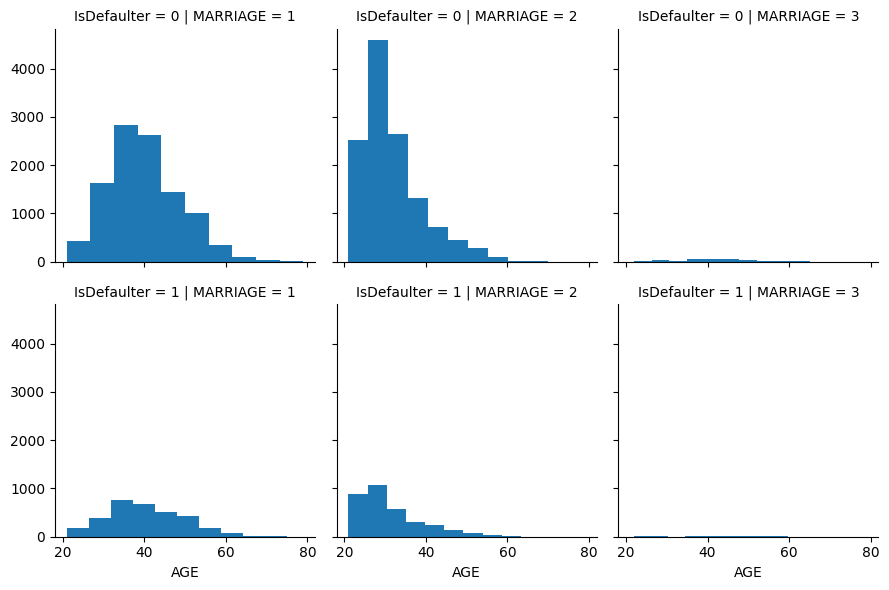

In [167]:
g = sns.FacetGrid(df, row='IsDefaulter', col='MARRIAGE')
g.map(plt.hist, 'AGE')
plt.show()

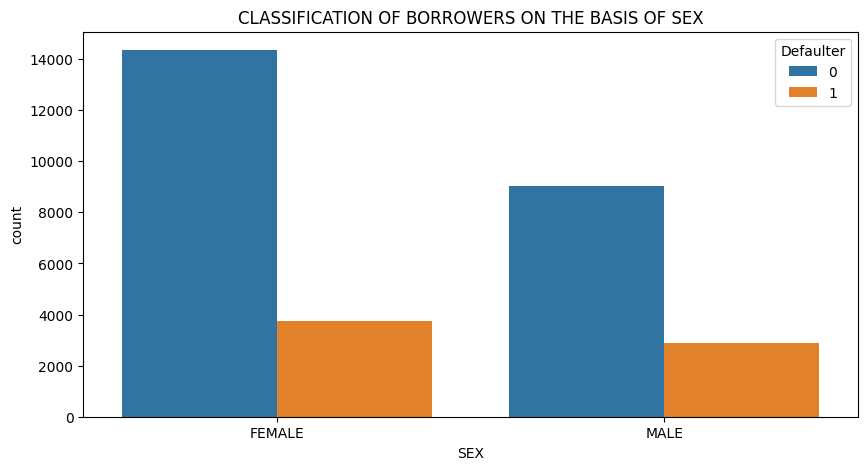

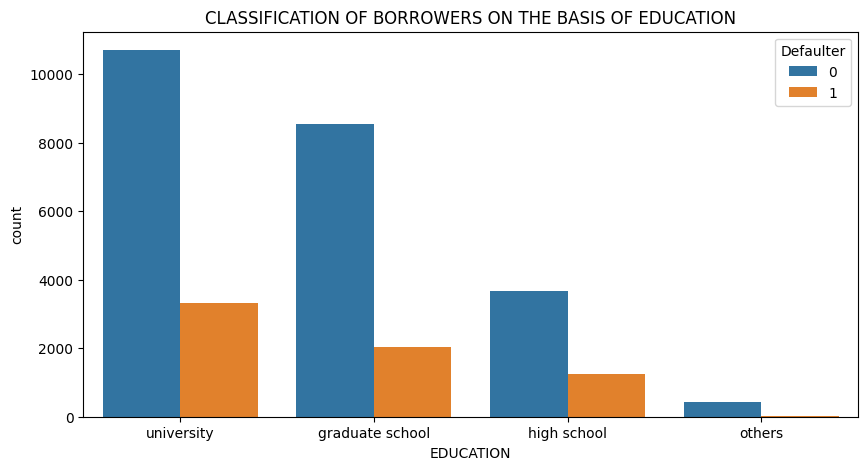

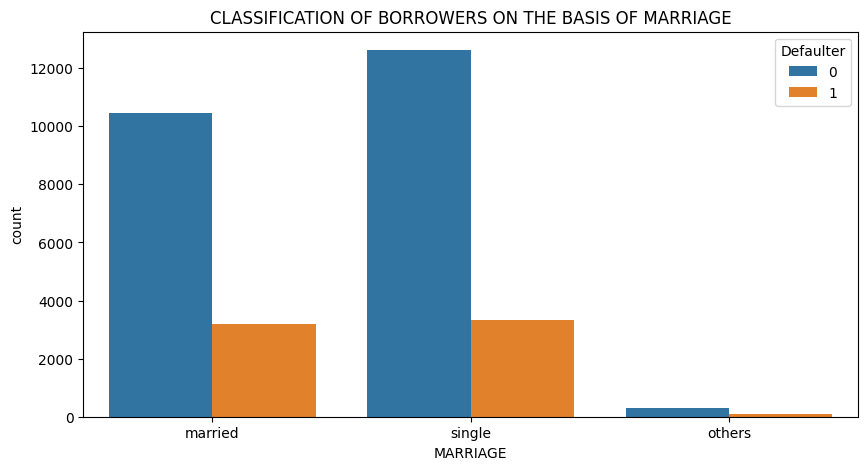

In [168]:
for col in categorical_features:
  plt.figure(figsize=(10,5))
  sns.countplot(x = col, hue = 'Defaulter', data = cat_df)
  plt.title(f"CLASSIFICATION OF BORROWERS ON THE BASIS OF {col}")

In [169]:
df['LIMIT_BAL'].describe()

count      30000.000000
mean      167484.322667
std       129747.661567
min        10000.000000
25%        50000.000000
50%       140000.000000
75%       240000.000000
max      1000000.000000
Name: LIMIT_BAL, dtype: float64

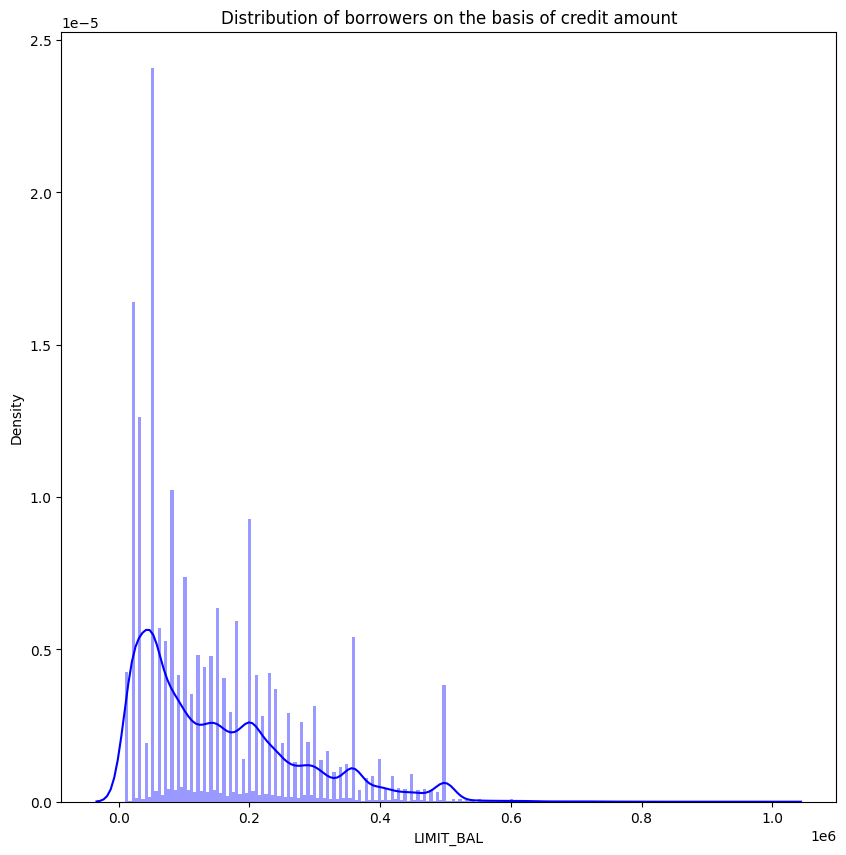

In [211]:
plt.figure(figsize=(10,10))
sns.distplot(df['LIMIT_BAL'],kde=True,bins=200, color="blue")
plt.title("Distribution of borrowers on the basis of credit amount")
plt.show()

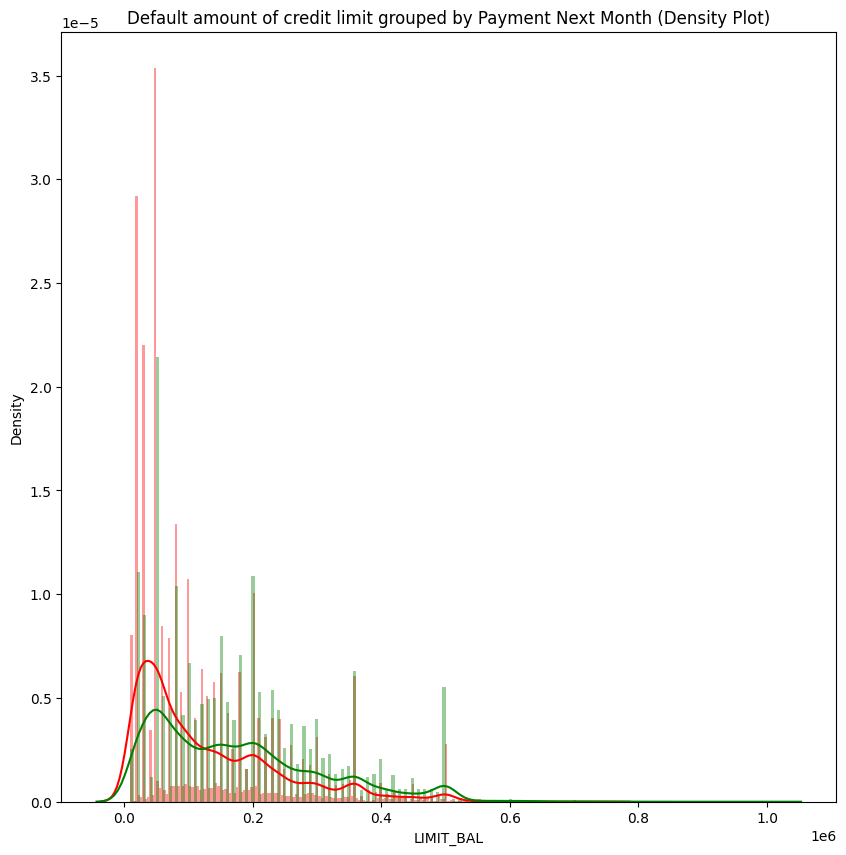

In [213]:
class_0 = df.loc[df['IsDefaulter'] == 0]["LIMIT_BAL"]
class_1 = df.loc[df['IsDefaulter'] == 1]["LIMIT_BAL"]
plt.figure(figsize = (10,10))
plt.title('Default amount of credit limit grouped by Payment Next Month (Density Plot)')
sns.set_color_codes("pastel")
sns.distplot(class_1,kde=True,bins=200, color="red")
sns.distplot(class_0,kde=True,bins=200, color="green")
plt.show()

Text(0.5, 1.0, 'DISTRIBUTION OF BORROWERS ON THE BASIS OF CREDIT AMOUNT (BOXPLOT)')

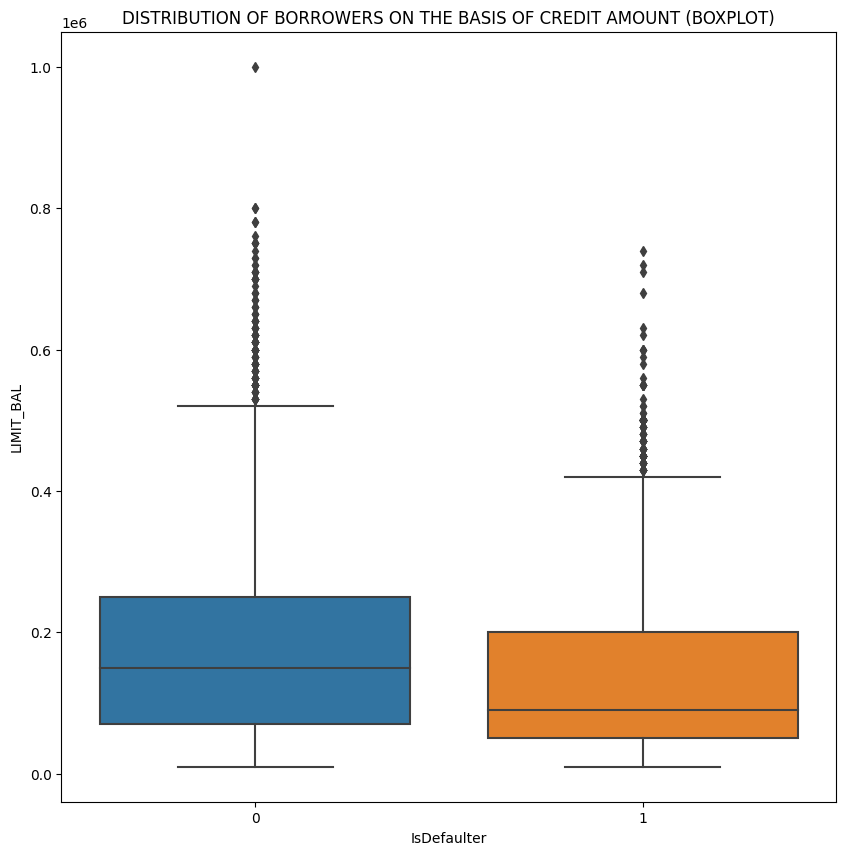

In [171]:
plt.figure(figsize=(10,10))
ax = sns.boxplot(x="IsDefaulter", y="LIMIT_BAL", data=df)
plt.title("DISTRIBUTION OF BORROWERS ON THE BASIS OF CREDIT AMOUNT (BOXPLOT)")

In [172]:
df['AGE'].value_counts()

29    1605
27    1477
28    1409
30    1395
26    1256
31    1217
25    1186
34    1162
32    1158
33    1146
24    1127
35    1113
36    1108
37    1041
39     954
38     944
23     931
40     870
41     824
42     794
44     700
43     670
45     617
46     570
22     560
47     501
48     466
49     452
50     411
51     340
53     325
52     304
54     247
55     209
56     178
58     122
57     122
59      83
60      67
21      67
61      56
62      44
63      31
64      31
66      25
65      24
67      16
69      15
70      10
68       5
73       4
72       3
75       3
71       3
79       1
74       1
Name: AGE, dtype: int64

Text(0.5, 1.0, 'Distribution of Age')

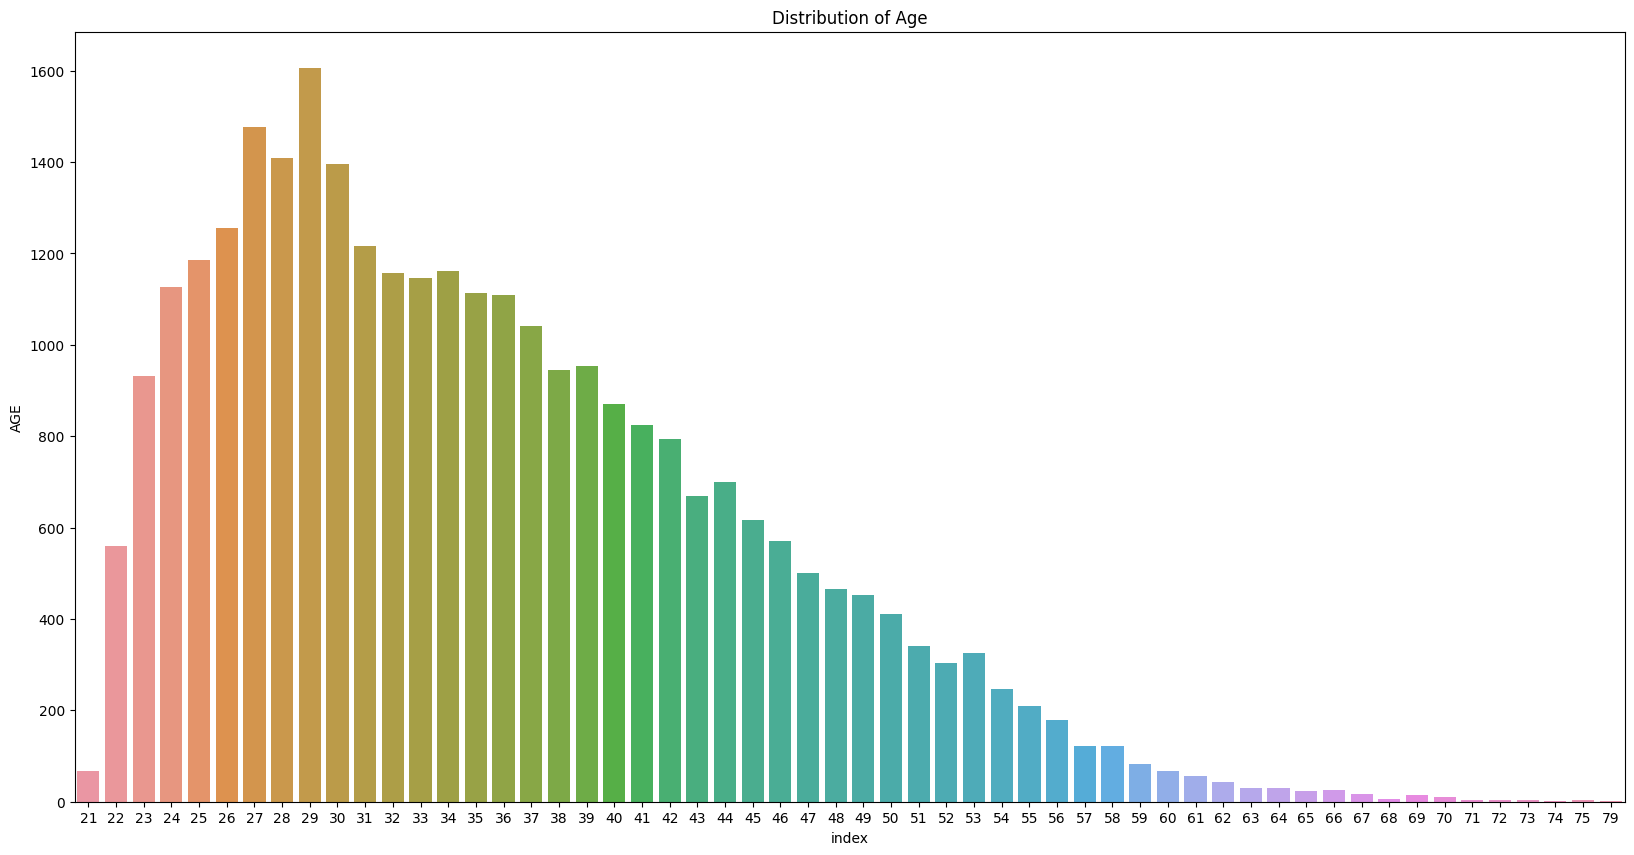

In [173]:
df['AGE']=df['AGE'].astype('int')
age = df['AGE'].value_counts().reset_index()

plt.figure(figsize=(20,10))
sns.barplot(x='index',y='AGE',data=age)
plt.title("Distribution of Age")

In [174]:
df.groupby('IsDefaulter')['AGE'].mean()

IsDefaulter
0    35.417266
1    35.725738
Name: AGE, dtype: float64

Text(0.5, 1.0, 'Distribution of Age (Boxplot)')

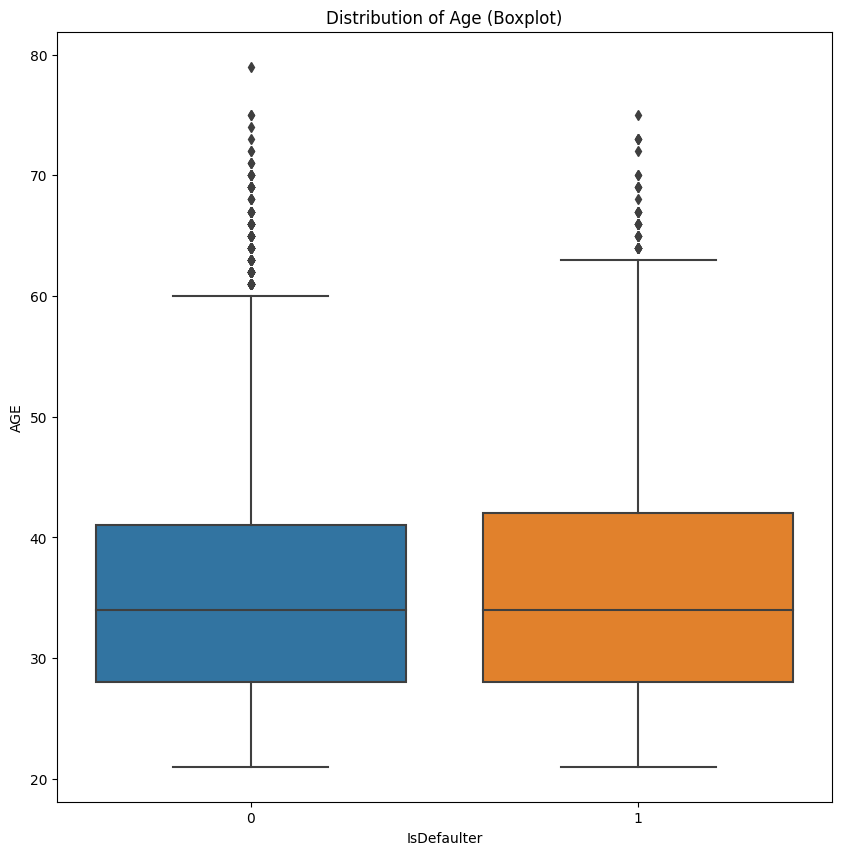

In [175]:
plt.figure(figsize=(10,10))
sns.boxplot(x="IsDefaulter", y="AGE", data=df)
plt.title("Distribution of Age (Boxplot)")

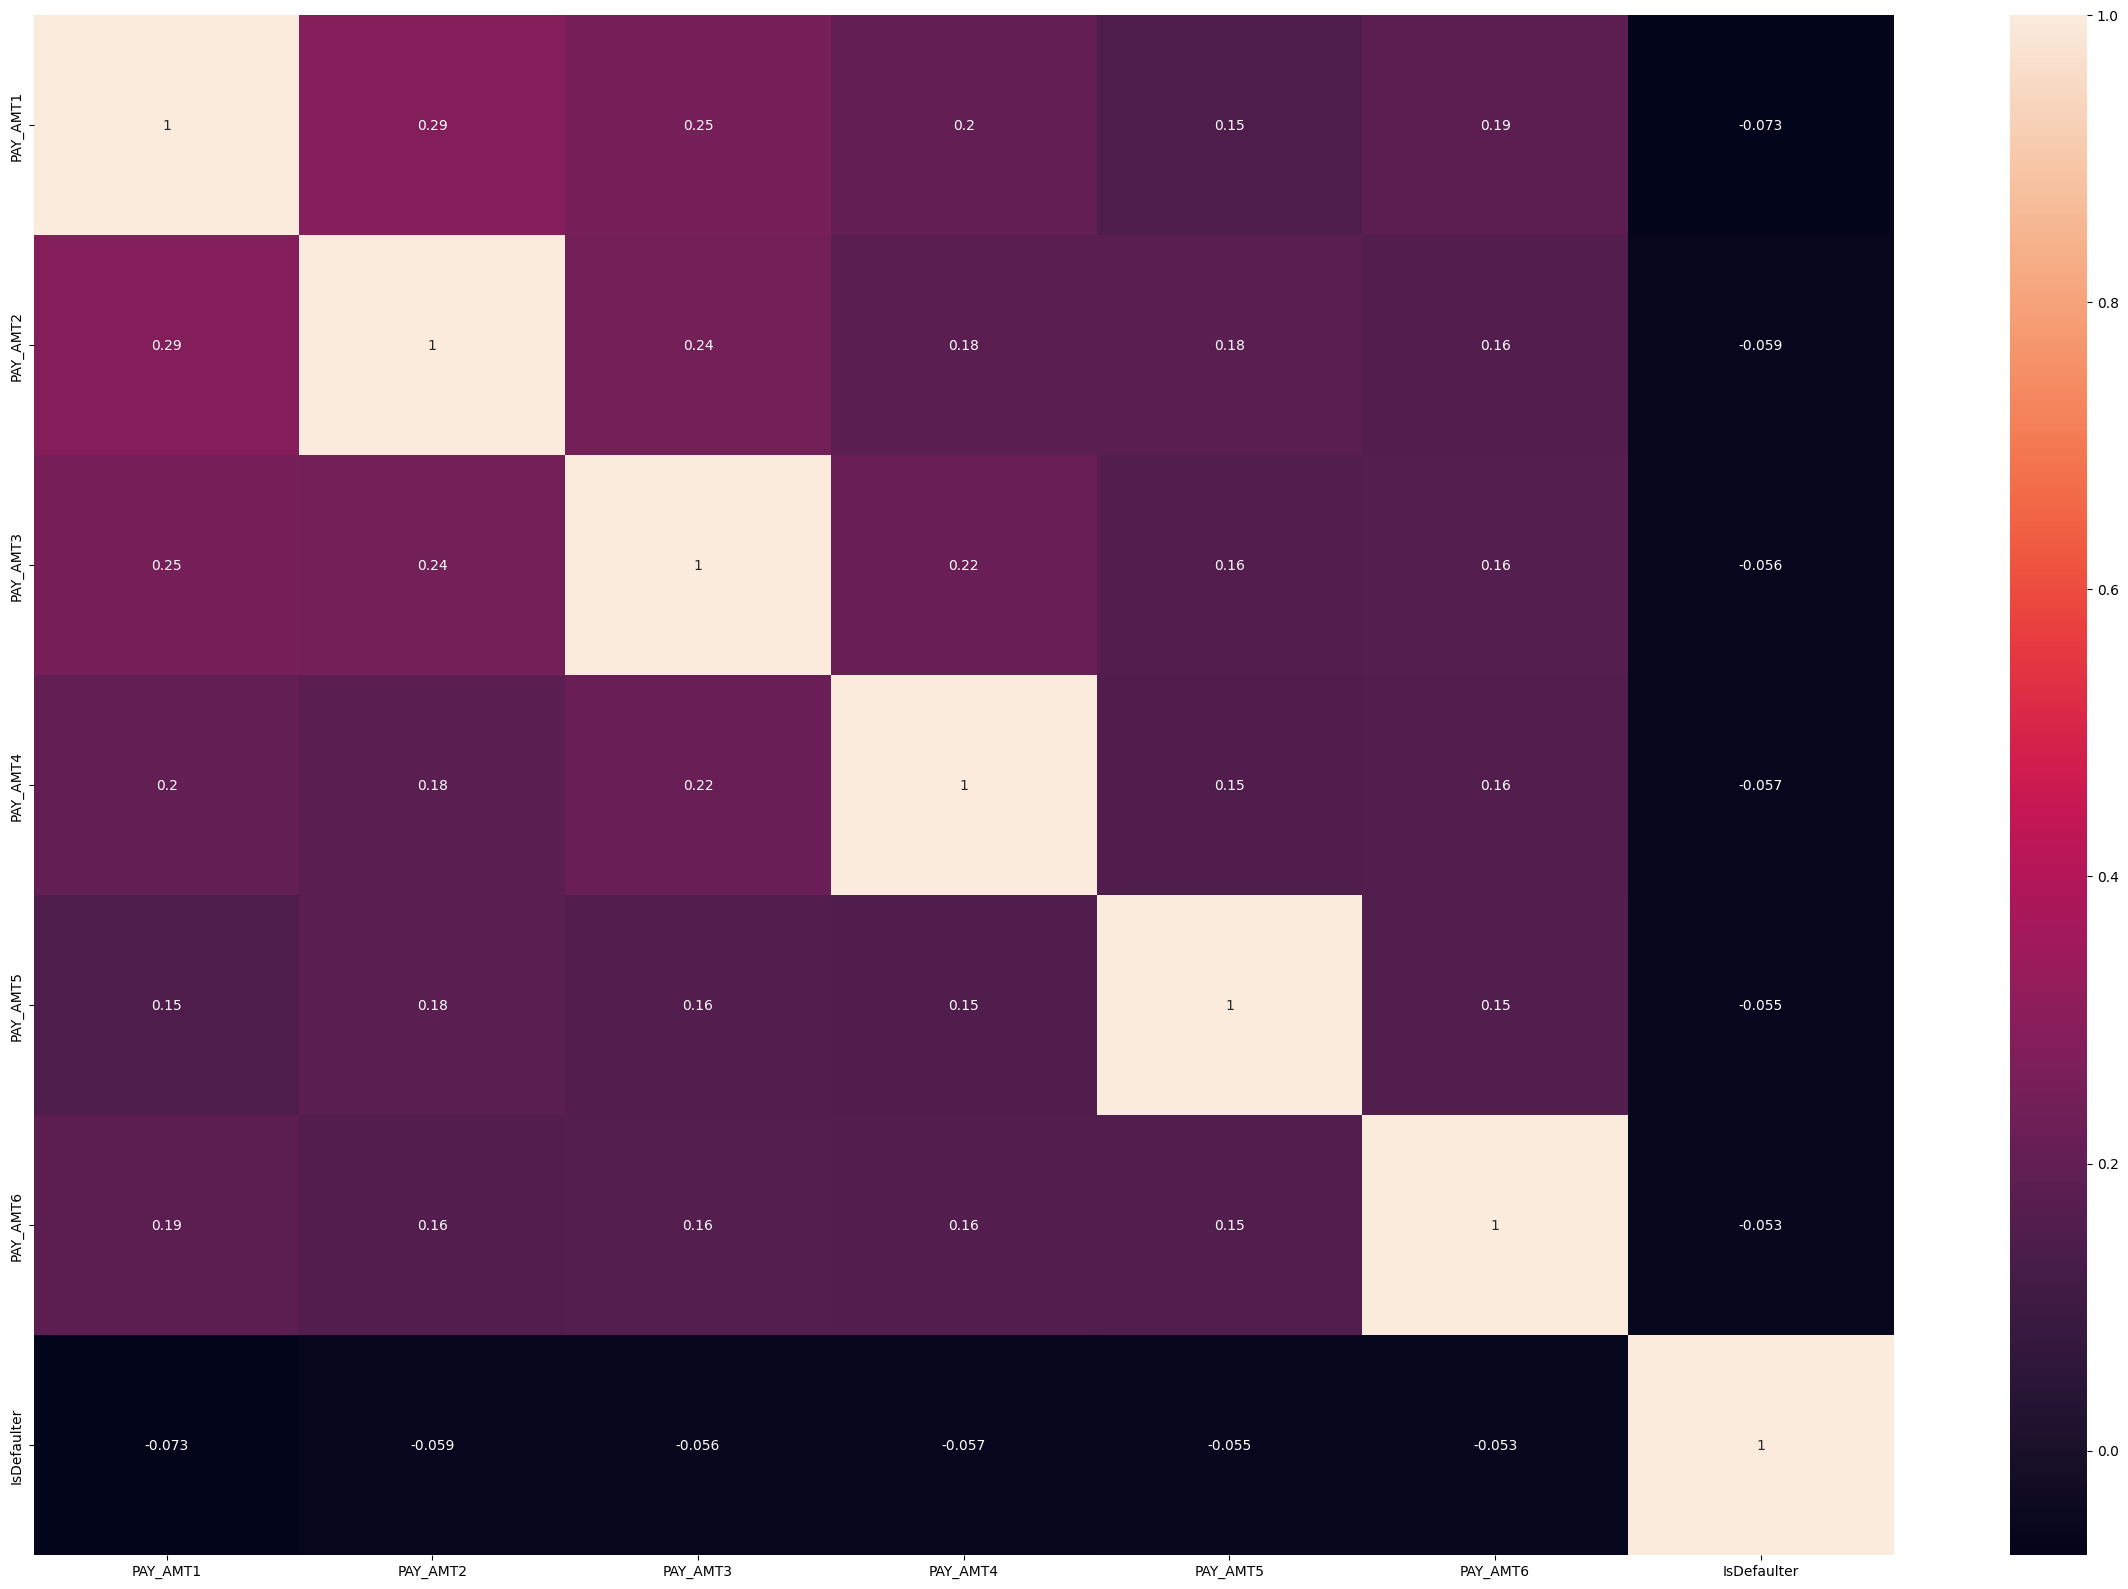

In [176]:
pay_amt_df = df[['PAY_AMT1', 'PAY_AMT2','PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'IsDefaulter']]

plt.subplots(figsize=(30,20))
sns.heatmap(pay_amt_df.corr(), annot=True)
plt.show()

In [177]:
smote = SMOTE(random_state=1729)

x_smote, y_smote = smote.fit_resample(df.iloc[:,0:-1], df['IsDefaulter'])

print('Original dataset size: ', len(df))
print('Resampled dataset size:', len(y_smote))

Original dataset size:  30000
Resampled dataset size: 46728


In [178]:
columns = list(df.columns)
columns.pop()

'IsDefaulter'

In [179]:
df = pd.DataFrame(x_smote, columns=columns)
df['IsDefaulter'] = y_smote

Text(0.5, 1.0, 'Distribution of Borrowers after SMOT')

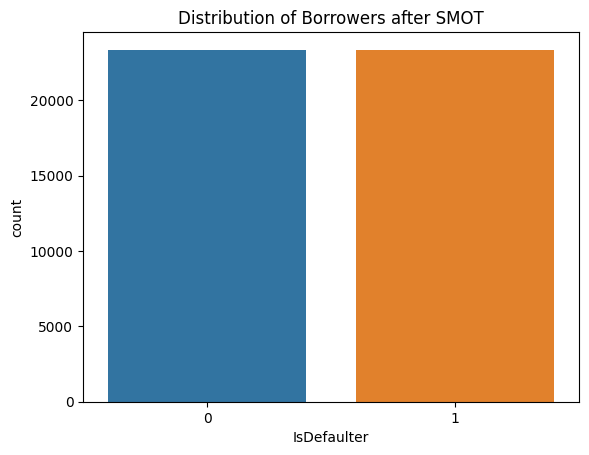

In [180]:
sns.countplot(x='IsDefaulter', data=df)
plt.title("Distribution of Borrowers after SMOT")

In [181]:
df['PaymentValue'] = df['PAY_0'] + df['PAY_2'] + df['PAY_3'] + df['PAY_4'] + df['PAY_5'] + df['PAY_6']
df.groupby('IsDefaulter')['PaymentValue'].mean()

IsDefaulter
0   -1.980140
1    1.651943
Name: PaymentValue, dtype: float64

Text(0.5, 1.0, 'Distribution of Borrowers on the basis of Payment Value')

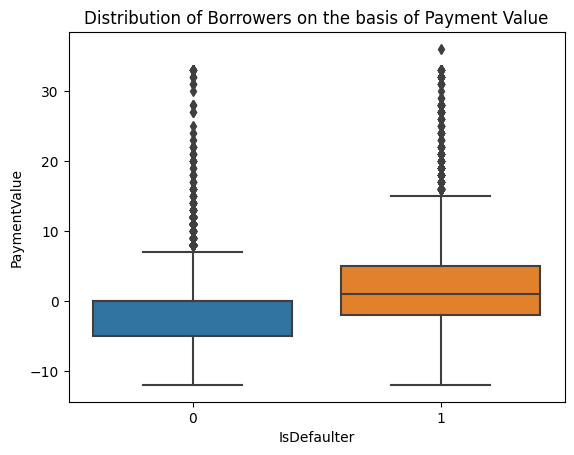

In [182]:
sns.boxplot(data = df, x = 'IsDefaulter', y = 'PaymentValue')
plt.title("Distribution of Borrowers on the basis of Payment Value")

In [183]:
df['Dues'] = (df['BILL_AMT1']+df['BILL_AMT2']+df['BILL_AMT3']+df['BILL_AMT4']+df['BILL_AMT5'])+df['BILL_AMT6']-(df['PAY_AMT1']+df['PAY_AMT2']+df['PAY_AMT3']+df['PAY_AMT4']+df['PAY_AMT5']+df['PAY_AMT6'])
df.groupby('IsDefaulter')['Dues'].mean()

IsDefaulter
0    237459.487203
1    243065.081390
Name: Dues, dtype: float64

In [184]:
df.replace({'SEX': {1 : 'MALE', 2 : 'FEMALE'}, 'EDUCATION' : {1 : 'graduate school', 2 : 'university', 3 : 'high school', 4 : 'others'}, 'MARRIAGE' : {1 : 'married', 2 : 'single', 3 : 'others'}}, inplace = True)

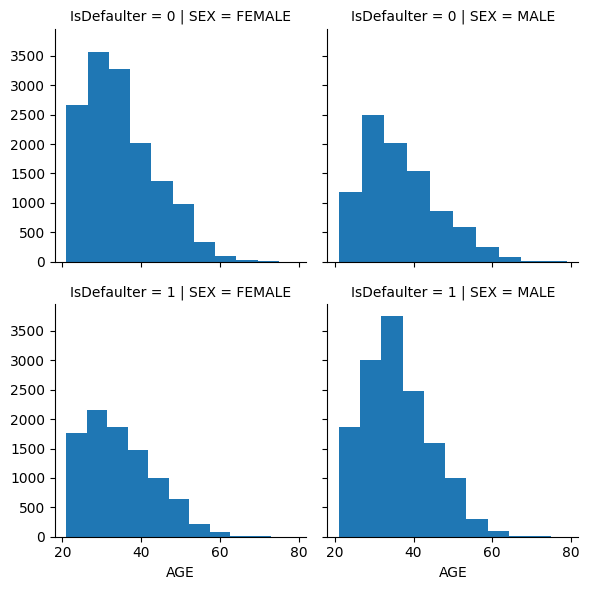

In [185]:
g = sns.FacetGrid(df, row='IsDefaulter', col='SEX')
g = g.map(plt.hist, 'AGE')

In [186]:
under_25 = df[df["AGE"] < 25]
default_rate_youth = under_25["IsDefaulter"].mean()

In [187]:
default_rate_youth

0.4894228258030817

In [188]:
middle = df[(df["AGE"] >= 25) & (df["AGE"] < 40)]
middle = middle["IsDefaulter"].mean()
middle

0.5033219732176667

In [189]:
middle = df[(df["AGE"] >= 40) & (df["AGE"] < 60)]
middle = middle["IsDefaulter"].mean()
middle

0.4989589530041642

---

### Financial Risk Modelling

In [190]:
data = pd.read_csv("UCI_Credit_Card.csv")

X = data.drop("default.payment.next.month", axis=1)
y = data["default.payment.next.month"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1729)

model = LogisticRegression()

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_scaled, y_train)

model.fit(X_train_resampled, y_train_resampled)

y_pred = model.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)

accuracy

0.6805

In [191]:
classification_report = classification_report(y_test, y_pred)
print(classification_report)

              precision    recall  f1-score   support

           0       0.87      0.69      0.77      4672
           1       0.37      0.65      0.48      1328

    accuracy                           0.68      6000
   macro avg       0.62      0.67      0.62      6000
weighted avg       0.76      0.68      0.71      6000



In [192]:
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)

[[3215 1457]
 [ 460  868]]


In [193]:
X_test_crisis = X_test.copy()
delay_period = 2 #months

for column in X_test_crisis.columns:
    if column.startswith('PAY_'):
        X_test_crisis[column] = np.clip(X_test_crisis[column] + delay_period, -1, 9)

X_test_crisis_scaled = scaler.transform(X_test_crisis)
y_pred_crisis = model.predict_proba(X_test_crisis_scaled)[:, 1]

payment_ability_crisis = pd.DataFrame({'ID': data.iloc[X_test.index]['ID'],
                                        'Original_Prediction': model.predict_proba(X_test_scaled)[:, 1],
                                       'Crisis_Prediction': y_pred_crisis,
                                       'Default_Status': y_test})
payment_ability_crisis['Difference'] = payment_ability_crisis['Crisis_Prediction'] - payment_ability_crisis['Original_Prediction']


In [194]:
def_0 = payment_ability_crisis[payment_ability_crisis["Default_Status"] == 0]
def_1 = payment_ability_crisis[payment_ability_crisis["Default_Status"] == 1]

In [195]:
df1 = df.copy()
def_0 = df.merge(def_0, on='ID', how='inner')
def_1 = df1.merge(def_1, on='ID', how='inner')
def_1

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,PAY_AMT4,PAY_AMT5,PAY_AMT6,IsDefaulter,PaymentValue,Dues,Original_Prediction,Crisis_Prediction,Default_Status,Difference
0,2,120000.0,FEMALE,university,single,26,-1,2,0,0,...,1000.000000,0.0,2000.0,1,3,1.207700e+04,0.382117,0.709340,1,0.327224
1,24,450000.0,FEMALE,graduate school,married,40,-2,-2,-2,-2,...,0.000000,0.0,1128.0,1,-12,4.376000e+03,0.159712,0.499551,1,0.339839
2,48,150000.0,FEMALE,others,single,46,0,0,-1,0,...,0.000000,0.0,0.0,1,-3,7.654000e+03,0.415082,0.736565,1,0.321483
3,48,20000.0,FEMALE,graduate school,married,22,0,0,2,0,...,333.486066,0.0,0.0,1,2,5.927294e+04,0.415082,0.736565,1,0.321483
4,61,500000.0,FEMALE,high school,married,28,0,0,0,0,...,1000.000000,2000.0,2000.0,1,0,1.008830e+05,0.398683,0.729234,1,0.330551
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2098,29905,60000.0,MALE,high school,single,30,0,0,0,0,...,2000.000000,1000.0,1462.0,1,0,3.254500e+05,0.469006,0.794813,1,0.325807
2099,29922,410000.0,MALE,graduate school,single,34,0,0,0,-1,...,1428.000000,0.0,0.0,1,-3,1.264270e+06,0.101012,0.405294,1,0.304282
2100,29933,160000.0,MALE,high school,married,42,2,0,0,0,...,3000.000000,4000.0,3000.0,1,2,6.974080e+05,0.693255,0.914283,1,0.221028
2101,29975,50000.0,MALE,university,married,37,1,2,2,2,...,0.000000,1000.0,1000.0,1,7,2.530300e+04,0.744874,0.920524,1,0.175650


Text(0.5, 1.0, 'Age Distribution of Defaulters')

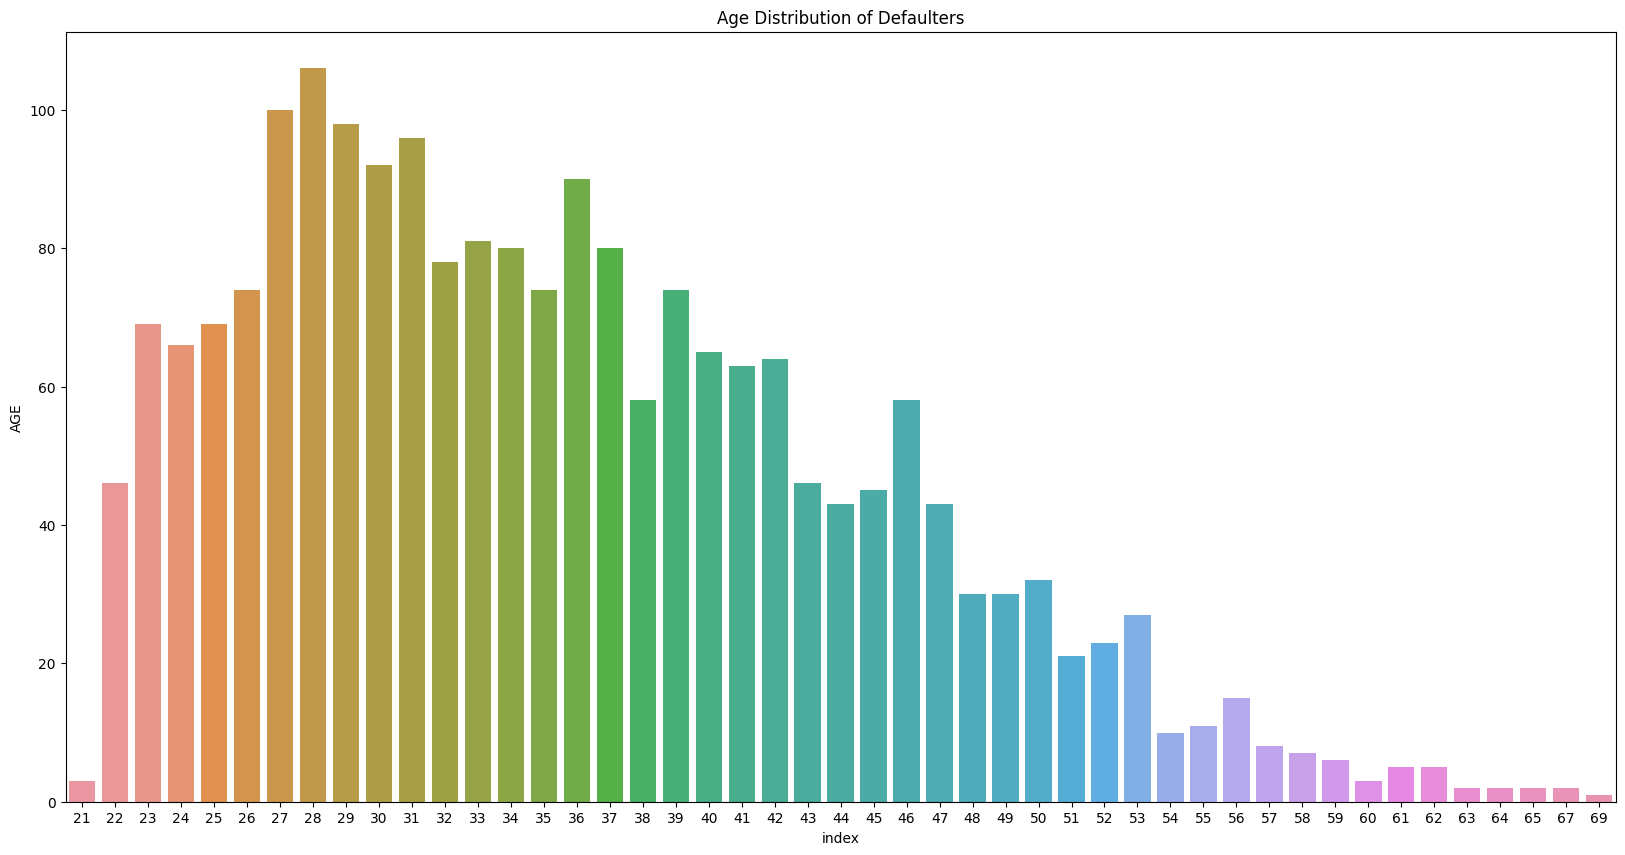

In [196]:
def_1['AGE']=def_1['AGE'].astype('int')
age = def_1['AGE'].value_counts().reset_index()

plt.figure(figsize=(20,10))
sns.barplot(x='index',y='AGE',data=age)
plt.title("Age Distribution of Defaulters")

Text(0.5, 1.0, 'Age Distribution of Non-Defaulters')

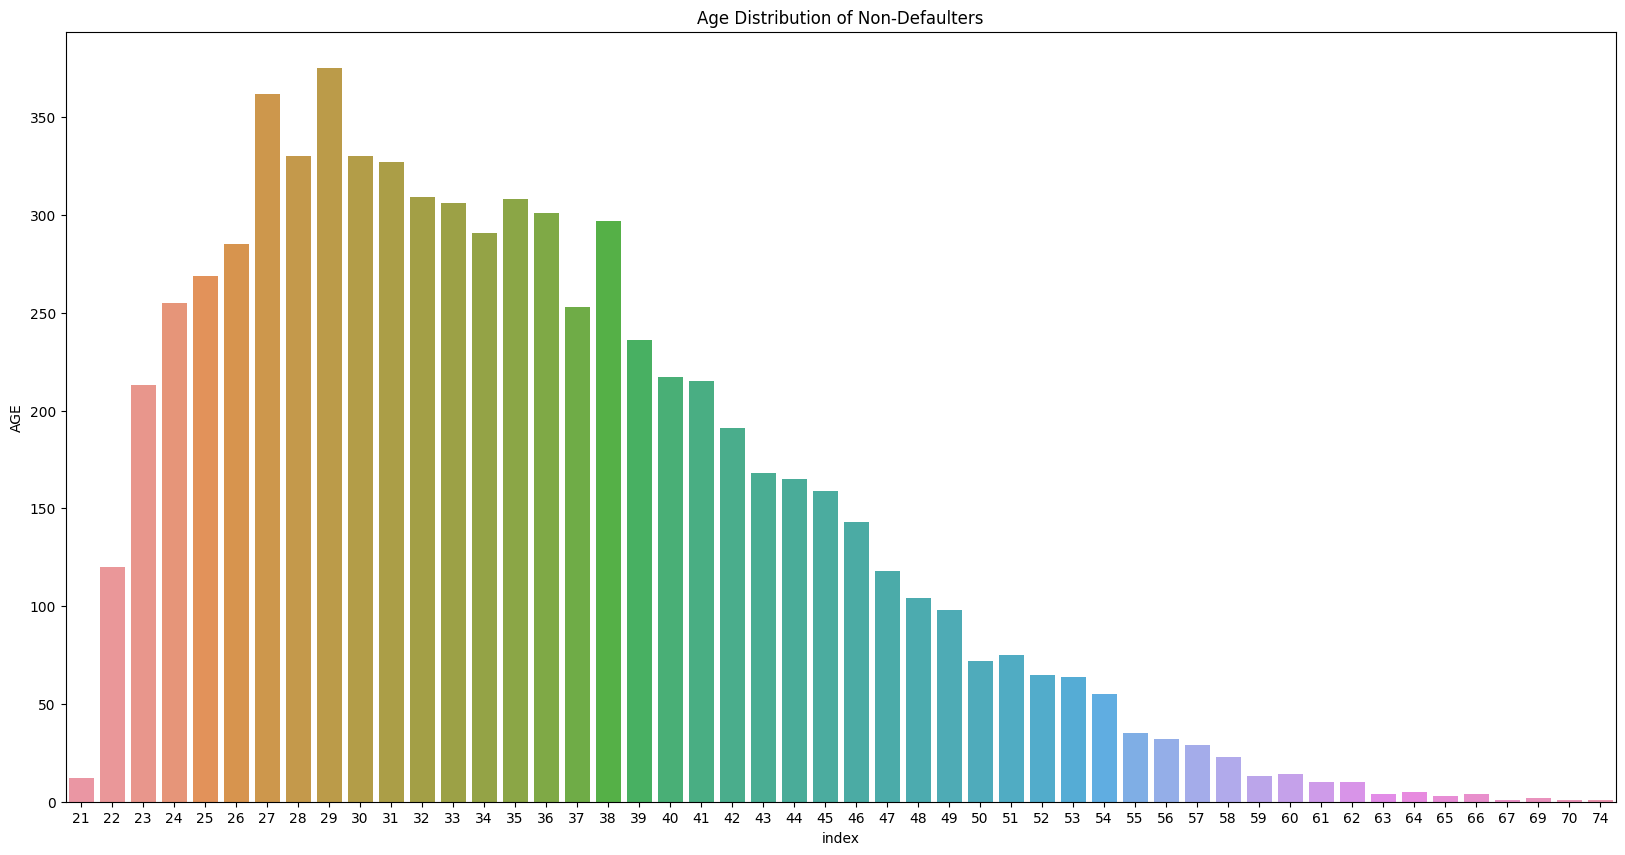

In [197]:
def_0['AGE']=def_0['AGE'].astype('int')
age = def_0['AGE'].value_counts().reset_index()

plt.figure(figsize=(20,10))
sns.barplot(x='index',y='AGE',data=age)
plt.title("Age Distribution of Non-Defaulters")

In [214]:
def plot_cat(df):
    if df['Default_Status'][0] == 1:
        group = "DEFAULTERS"
    else:
        group = "NON-DEFAULTERS"

    categorical_features = ['SEX', 'EDUCATION', 'MARRIAGE']

    for col in categorical_features:
      plt.figure(figsize=(10,5))
      sns.countplot(x = col, hue='Default_Status', data = df)
      plt.legend().remove()
      plt.title(f"{col} CLASSIFICATION AMONG {group}")

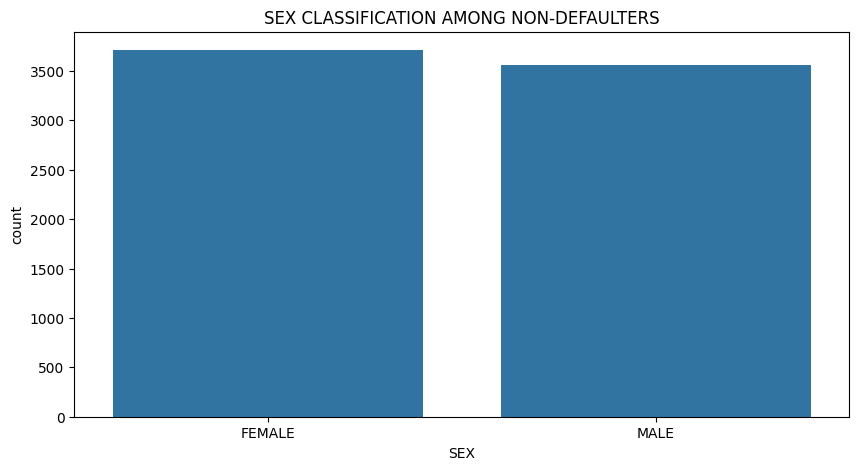

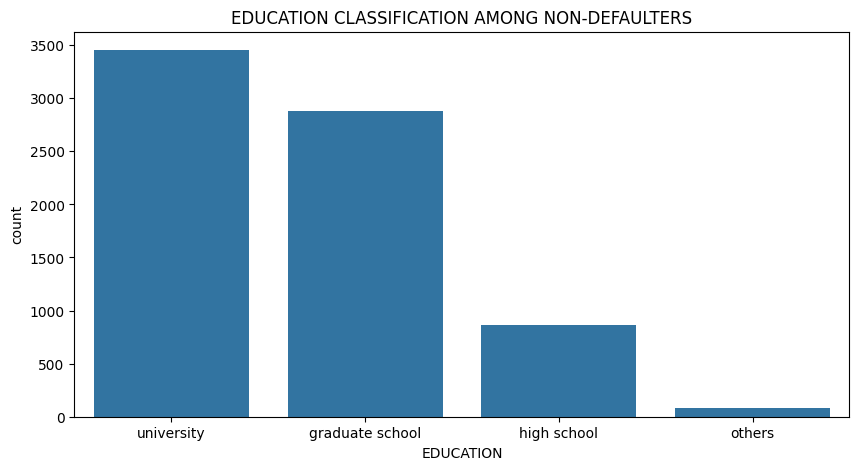

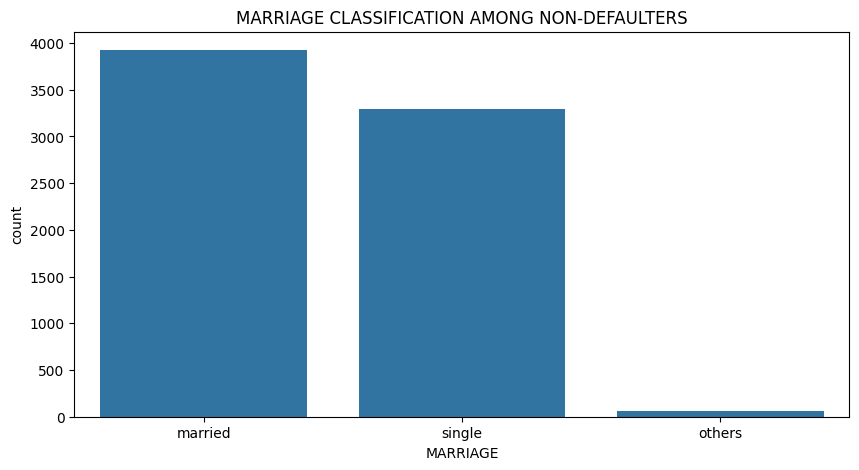

In [215]:
plot_cat(def_0)

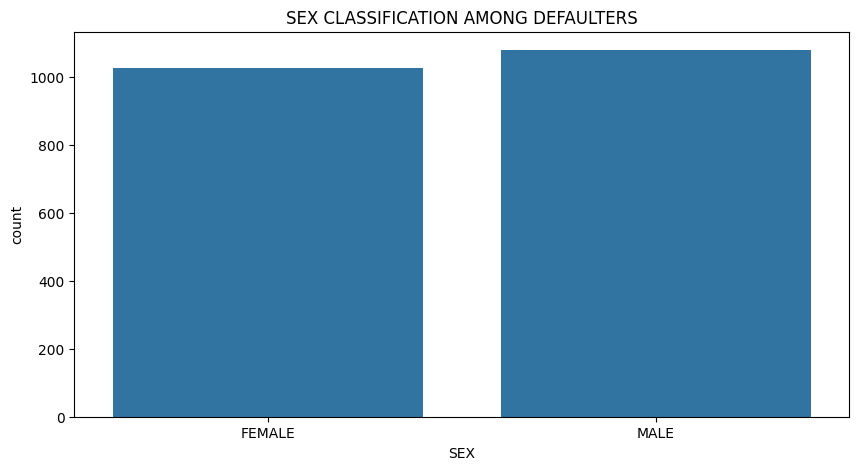

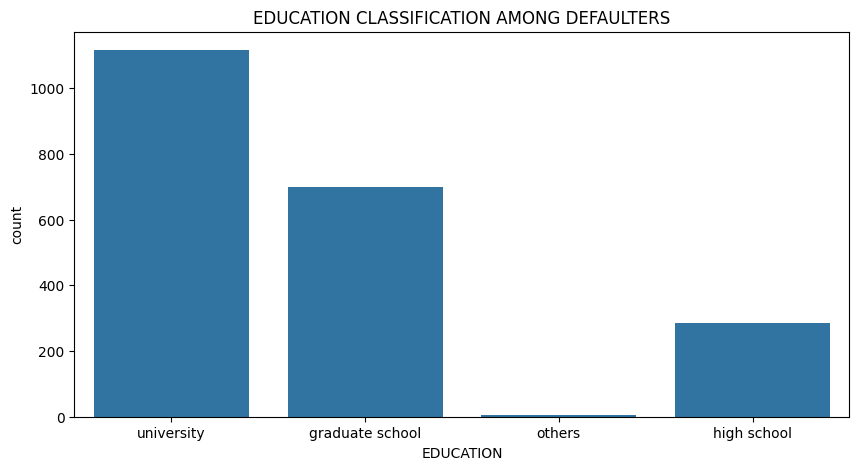

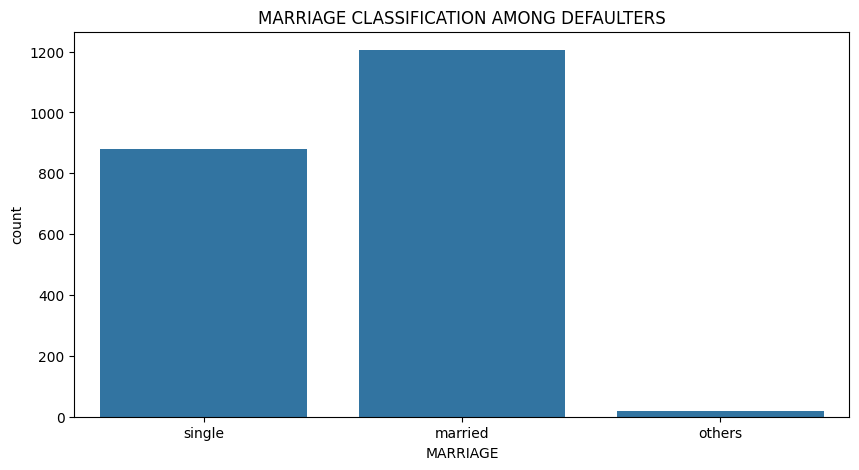

In [216]:
plot_cat(def_1)

In [201]:
def plot_dues(df):
    if df['Default_Status'][0] == 1:
        group = "DEFAULTERS"
    else:
        group = "NON-DEFAULTERS"
        
    sns.distplot(df['Dues'], kde=False)
    plt.title(f"DUE DISTRIBUTION OF {group}")
    plt.show()


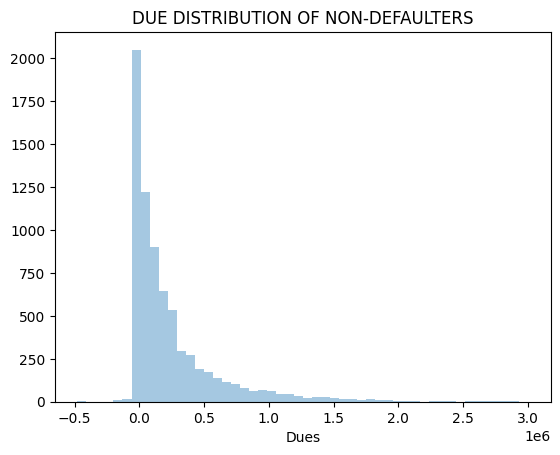

In [202]:
plot_dues(def_0)

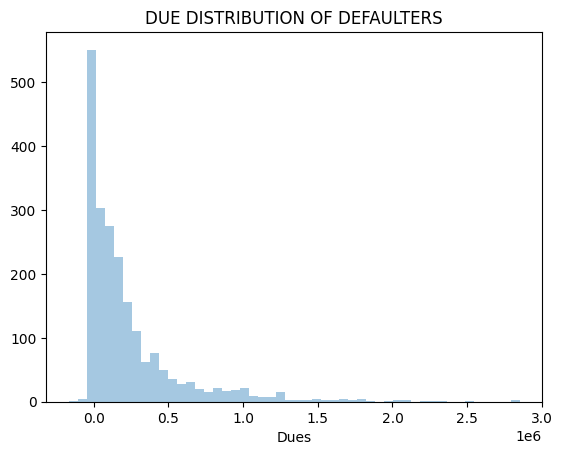

In [203]:
plot_dues(def_1)

In [204]:
def plot_default_prob(df):
    if df['Default_Status'][0] == 1:
        group = "DEFAULTERS"
    else:
        group = "NON-DEFAULTERS"
        
    sns.distplot(df['Crisis_Prediction'])
    plt.title(f"PROBABILITY DISTRIBUTION OF DEFAULTS AMONG {group}")
    plt.show()

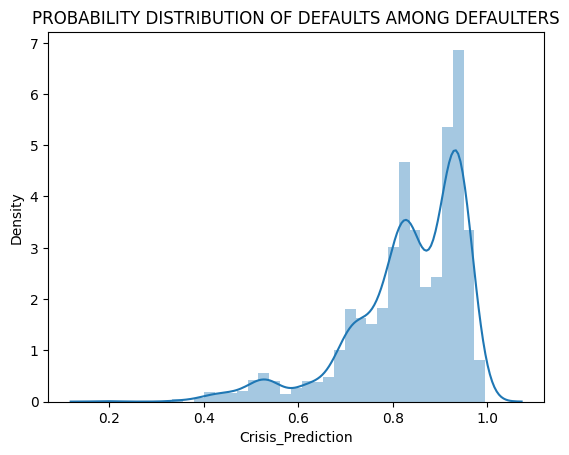

In [205]:
plot_default_prob(def_1)

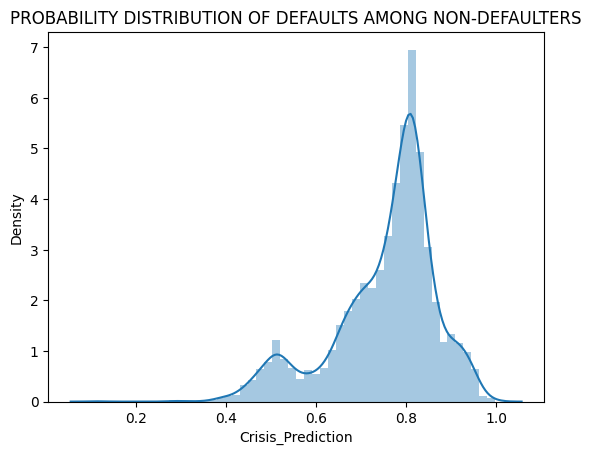

In [206]:
plot_default_prob(def_0)

---